# Implementing a Simple Neural Network with Numpy

Based on Justin Johnson's notes [here](https://github.com/jcjohnson/pytorch-examples)

In [1]:
import sys
sys.version

'3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Hyperparameters ###

# N is batch size
# D_in in input dimension
# D_h is hidden dimension
# D_out is output dimension

# start out small
N, D_in, D_hid, D_out = 4, 16, 10, 2
learning_rate = 1e-6

### Data ###
# N x D_in matrix - for input
X = np.random.randn(N, D_in)
# N x D_out matrix - as output labels
y = np.random.randn(N, D_out)

### Weights ###
w1 = np.random.randn(D_in, D_hid)
w2 = np.random.randn(D_hid, D_out)

# Vector to which loss over training is saved
loss_vec = []

# Epochs
epochs = 10

debug = False

### Train neural net ###
for t in range(epochs):
    ### Forward pass ###
    h = X.dot(w1)
    # Apply an activation function (ReLU) to the weights x input
    h_relu = np.maximum(h, 0)
    # Predict with these weights
    y_pred = h_relu.dot(w2)
    
    ### Loss ###
    # -calculates the error in the network, Meas Square Error, here (or MSE)
    # - different loss functions used for different tasks
    # - this process is done until the loss has reached a minima
    loss = np.square(y_pred - y).sum()
    
    ### Backpropagation  ###
    # - gradients of w1 and w2 with respect to loss
    # - typically a gradient is the partial derivative of
    #   the loss function with respect to the weights
    # - typically and optimization function is what calculates the graidents,
    #   but here we simply calculate
    # Partial derivative calculation (derivative of loss)
    grad_y_pred = 2.0 * (y_pred - y)
    # Gradient from output to application of ReLU
    grad_w2 = h_relu.T.dot(grad_y_pred)
    # Gradient from predition to hidden
    grad_h_relu = grad_y_pred.dot(w2.T)
    # Apply similar transformation as ReLU
    grad_h = grad_h_relu.copy()
    grad_h[grad_h < 0] = 0
    # Gradient from hidden to input
    grad_w1 = X.T.dot(grad_h)
    
    ### Updates to weights ###
    # - typically weigts are modified according to an optimization function
    # - the gradient gives the direction and the learning rate, 
    #   the size of the step
    # - weights are modified in the opposite direction of the gradient
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
    if debug:
        print('Forward pass:', h)
        print('Activation function:', h_relu)
        print('Current prediction:', y_pred)
        print('Loss:', t, loss)
        print('Grad y pred', grad_y_pred)
        print('Grad w2', grad_w2)
        print('Grad w1', grad_w1)
        print('New weights 1: ', w1, '\n', 'New weights 2: ', w2)
        
    loss_vec.append(loss)

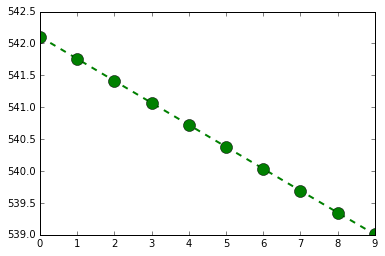

In [4]:
plt.plot(range(epochs), loss_vec, 'go--', linewidth=2, markersize=12)

## Further Reading

1. Nice article on loss functions and optimization/optimizers [Ref](https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c)